In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preparing Data

Transforming the dataframe in a Pandas Series of Vitória's average monthly temperature

In [2]:
df = pd.read_csv('station_vitoria.csv')

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1961,26.09,27.29,27.08,26.35,999.90,22.58,21.90,23.14,25.10,24.92,25.41,25.54,26.25,25.92,22.54,25.14,24.96
1,1962,26.38,26.81,26.82,999.90,23.46,21.18,21.12,22.50,22.46,23.14,24.53,24.95,26.24,25.22,21.60,23.38,24.11
2,1963,27.59,26.73,999.90,25.56,23.31,21.98,21.75,21.87,23.78,24.82,25.69,24.78,26.42,25.15,21.87,24.76,24.55
3,1964,25.28,999.90,999.90,999.90,999.90,22.02,20.24,21.84,22.41,23.23,23.49,25.06,25.39,999.90,21.37,23.04,23.56
4,1965,25.65,27.18,26.40,25.48,24.09,23.07,22.46,23.64,24.19,23.77,999.90,27.54,25.96,25.32,23.06,24.39,24.68


In [4]:
df = df.replace(999.90, np.NaN).interpolate('linear')

In [5]:
df = df.T

In [6]:
df.columns = df.iloc[0]

In [7]:
df.drop('YEAR', inplace = True)

In [8]:
df

YEAR,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
JAN,26.09,26.380,27.59,25.280,25.65,27.380,27.4800,26.150,27.8000,25.97,27.99,27.93,28.34,26.95,26.22,27.70,26.98,26.60,24.560000,26.180000,27.320000,26.725000,26.13,27.52,25.51,26.90,27.19,27.335,27.48,27.770,27.663333,27.556667,27.45,27.34,28.65,28.13,27.36,28.570,28.4180,28.266,28.1140,27.962,27.81,26.24,27.60,28.06,27.38,26.13,27.29,29.62,28.24,26.66,27.80,28.05,28.950,27.85,29.10,28.60,29.35
FEB,27.29,26.810,26.73,26.955,27.18,28.060,27.6200,27.990,28.3600,27.12,28.71,27.27,28.46,26.94,28.17,27.38,27.30,26.47,25.840000,26.180000,26.520000,26.860000,26.93,27.62,27.51,28.10,27.49,27.835,28.18,28.190,27.415000,26.640000,27.98,28.49,28.51,29.10,27.26,28.900,28.9020,28.904,28.9060,28.908,28.91,27.01,26.91,29.55,27.00,27.37,28.60,29.50,28.61,27.58,28.40,28.75,29.050,30.00,28.40,27.50,29.65
MAR,27.08,26.820,26.68,26.540,26.40,27.490,27.4100,27.300,27.1900,27.33,27.77,28.00,26.45,26.37,26.68,27.30,28.60,26.86,25.440000,25.662500,25.885000,26.107500,26.33,27.02,27.31,27.70,26.39,26.835,27.28,28.470,28.516667,28.563333,28.61,27.08,27.70,28.51,25.78,28.440,28.4620,28.484,28.5060,28.528,28.55,26.52,27.46,27.53,28.15,27.49,28.21,27.99,26.71,27.68,27.55,28.00,28.550,28.95,28.10,28.35,28.90
APR,26.35,25.955,25.56,25.520,25.48,25.270,25.2875,25.305,25.3225,25.34,26.22,24.80,27.08,25.32,24.62,26.10,26.03,25.03,24.940000,25.740000,25.603333,25.466667,25.33,24.72,25.61,26.50,26.69,26.685,26.68,27.870,27.305000,26.740000,26.70,25.66,25.75,26.12,25.50,27.690,27.5500,27.410,27.2700,27.130,26.99,26.05,27.10,25.95,26.85,27.45,26.02,26.40,26.36,27.15,25.45,26.80,26.900,28.50,26.35,25.95,28.05
MAY,NaN,23.460,23.31,23.700,24.09,23.800,23.9100,24.125,24.3400,24.91,24.45,23.68,24.26,24.08,22.91,23.92,23.90,23.91,24.114000,24.318000,24.522000,24.726000,24.93,25.52,23.61,25.50,24.59,23.985,23.38,24.650,25.355000,26.060000,24.47,25.64,24.81,23.56,23.91,25.580,25.4420,25.304,25.1660,25.028,24.89,24.88,25.10,24.10,24.18,24.00,24.67,24.86,24.20,23.65,24.85,25.20,24.300,25.70,24.30,24.45,26.60
JUN,22.58,21.180,21.98,22.020,23.07,23.425,23.7800,23.190,22.6000,23.93,22.85,24.18,24.63,22.43,22.00,23.72,23.62,22.19,22.506667,22.823333,23.140000,23.820000,23.83,23.92,21.81,22.80,22.89,22.685,22.48,23.970,24.055000,24.140000,22.80,23.59,23.86,22.93,24.07,22.940,23.3860,23.832,24.2780,24.724,25.17,23.69,23.46,22.64,24.00,23.61,22.83,22.29,22.99,24.50,24.55,24.45,24.150,23.15,24.65,24.25,25.10
JUL,21.90,21.120,21.75,20.240,22.46,21.960,22.2800,22.225,22.1700,21.32,22.29,22.27,23.40,22.21,21.11,22.13,23.55,22.84,22.210000,22.305000,22.400000,22.230000,23.43,23.12,21.41,21.60,23.49,22.635,21.78,22.870,22.480000,22.640000,23.65,23.17,23.75,22.31,23.26,23.410,23.4840,23.558,23.6320,23.706,23.78,22.26,22.60,22.71,23.92,22.97,23.80,23.09,22.97,23.75,23.35,22.85,23.325,23.80,21.95,24.25,23.25
AUG,23.14,22.500,21.87,21.840,23.64,22.150,22.8500,22.840,22.8300,21.87,22.66,23.18,22.95,22.93,23.38,23.15,23.70,22.83,22.910000,22.990000,23.070000,22.630000,22.03,22.12,22.51,23.20,22.69,22.385,22.08,22.335,22.590000,22.400000,22.56,22.53,24.43,22.10,23.60,24.760,24.7725,24.785,24.7975,24.810,22.88,23.08,24.12,23.66,23.38,24.27,23.30,22.52,24.05,22.99,23.70,23.34,24.200,24.25,22.25,23.30,23.05
SEP,25.10,22.460,23.78,22.410,24.19,22.210,22.9500,23.300,23.6500,22.82,22.79,23.05,22.65,23.55,22.83,22.93,23.07,22.82,22.647500,22.475000,22.302500,22.130000,22.43,22.72,22.21,22.40,23.39,23.285,23.18,22.270,22.650000,22.930000,24.25,23.29,24.12,23.06,24.75,24.990,24.5475,24.105,23.6625,23.220,23.34,24.69,23.50,23.02,23.31,23.49,25.60,23.95,23.23,23.95,24.10,24.70,26.150,24.95,23

In [9]:
df[0:12][df.columns[0]]

JAN    26.09
FEB    27.29
MAR    27.08
APR    26.35
MAY      NaN
JUN    22.58
JUL    21.90
AUG    23.14
SEP    25.10
OCT    24.92
NOV    25.41
DEC    25.54
Name: 1961.0, dtype: float64

# 

In [10]:
df = np.hstack([df[0:12][df.columns[i]] for i in range(df.shape[1])])

In [11]:
df = pd.DataFrame(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       707 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [13]:
start = pd.Timestamp('1961-01')
end = pd.Timestamp('2019-12')

In [14]:
t = np.linspace(start.value, end.value, 708)
t = pd.to_datetime(t)

In [15]:
df.index = t

In [16]:
df.head()

,0
1961-01-01 00:00:00.000000000,26.09
1961-01-31 10:27:19.603960384,27.29
1961-03-02 20:54:39.207920800,27.08
1961-04-02 07:21:58.811881184,26.35
1961-05-02 17:49:18.415841600,NaN


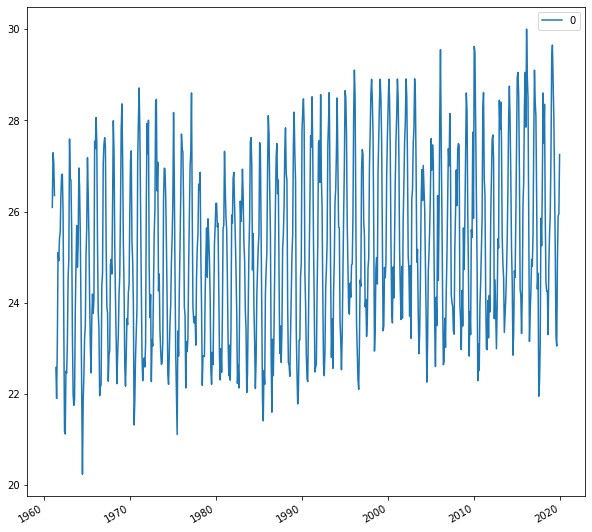

In [17]:
df.plot(figsize=(10,10))

In [18]:
df.head(10)

,0
1961-01-01 00:00:00.000000000,26.09
1961-01-31 10:27:19.603960384,27.29
1961-03-02 20:54:39.207920800,27.08
1961-04-02 07:21:58.811881184,26.35
1961-05-02 17:49:18.415841600,NaN
1961-06-02 04:16:38.019801984,22.58
1961-07-02 14:43:57.623762368,21.90
1961-08-02 01:11:17.227722784,23.14
1961-09-01 11:38:36.831683168,25.10
1961-10-01 22:05:56.435643552,24.92


In [19]:
df.rename(columns = {0:'Temp'}, inplace = True)
df['Date'] = df.index

In [20]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [21]:
df['Date_Lag1'] = df['Date'].shift(1)

In [22]:
df.head()

,Temp,Date,Date_Lag1
0,26.09,1961-01-01 00:00:00.000000000,NaT
1,27.29,1961-01-31 10:27:19.603960384,1961-01-01 00:00:00.000000000
2,27.08,1961-03-02 20:54:39.207920800,1961-01-31 10:27:19.603960384
3,26.35,1961-04-02 07:21:58.811881184,1961-03-02 20:54:39.207920800
4,NaN,1961-05-02 17:49:18.415841600,1961-04-02 07:21:58.811881184


In [23]:
df = df.interpolate('linear').drop(0).reset_index().drop('index', axis = 1)

In [24]:
X = df.drop('Temp', axis = 1)
y=df['Temp']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Temp       707 non-null    float64       
 1   Date       707 non-null    datetime64[ns]
 2   Date_Lag1  707 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 16.7 KB


In [26]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

In [27]:
df_p = df.rename(columns={'Date': 'ds', 'Temp':'y'})
df_p.drop('Date_Lag1',1, inplace = True)

In [28]:
prophet = Prophet()
df_p1 = df_p[:500]
df_p2 = df_p[500:]

prophet.fit(df_p1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = prophet.make_future_dataframe(periods=207, freq = 'M')

In [30]:
forecast = prophet.predict(future)
forecast_pred = forecast[500:]

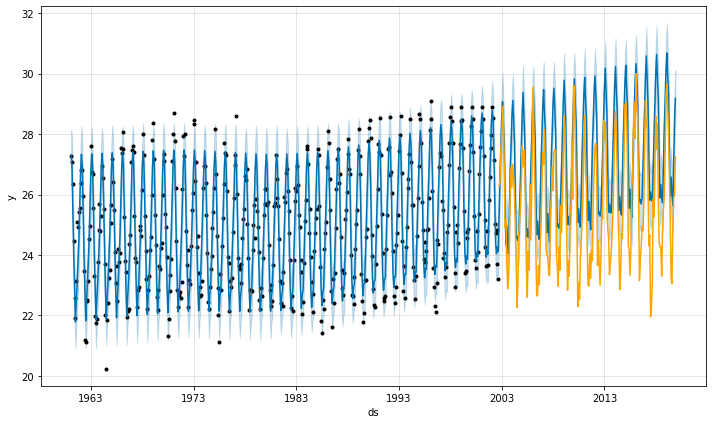

In [31]:
prophet.plot(forecast)
plt.plot(df_p.ds[500:], df_p.y[500:], c = 'orange')

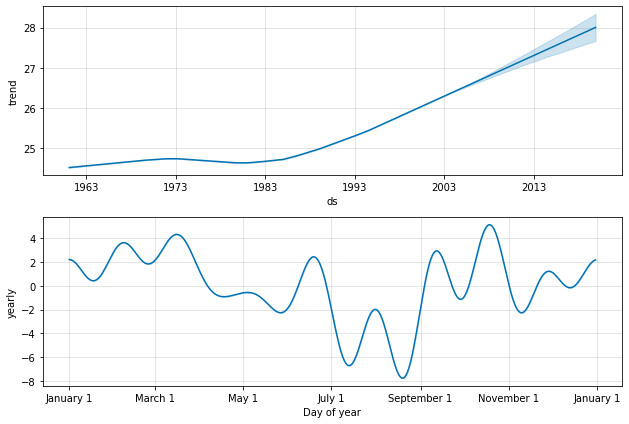

In [32]:
fig1 = prophet.plot_components(forecast)

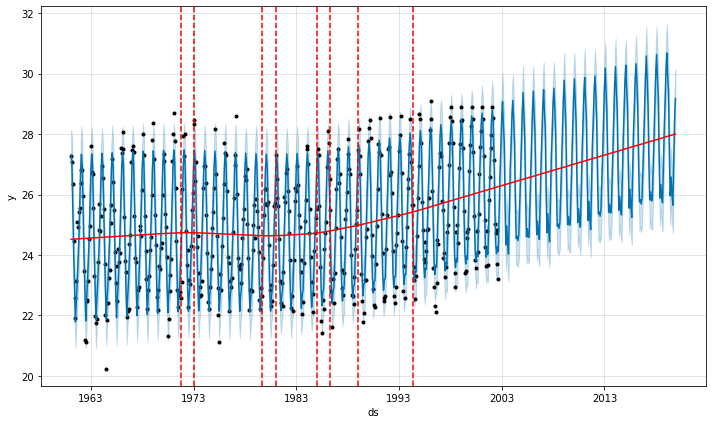

In [33]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


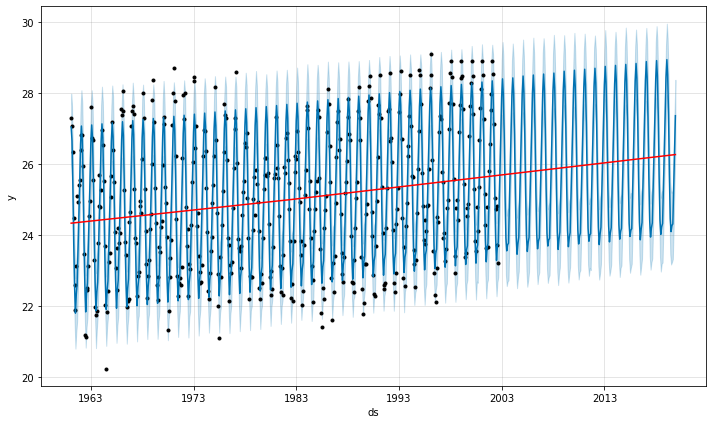

In [34]:
pro_change= Prophet(changepoint_range=0.8, changepoint_prior_scale=0.002)
forecast = pro_change.fit(df_p1).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


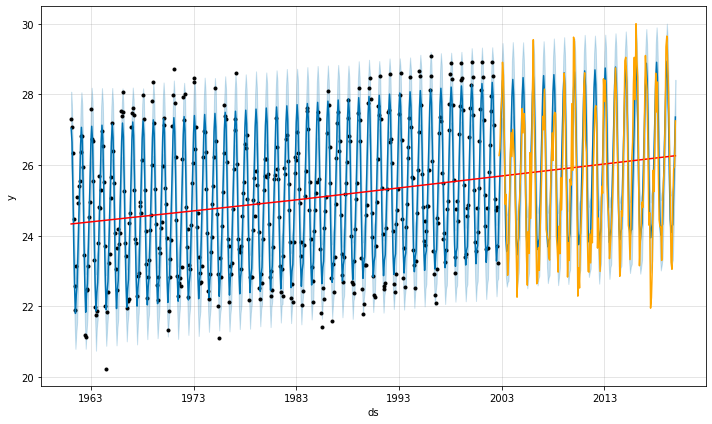

In [44]:
pro_change= Prophet(changepoint_prior_scale=0.002)
forecast = pro_change.fit(df_p1).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

plt.plot(df_p.ds[500:], df_p.y[500:], c = 'orange')

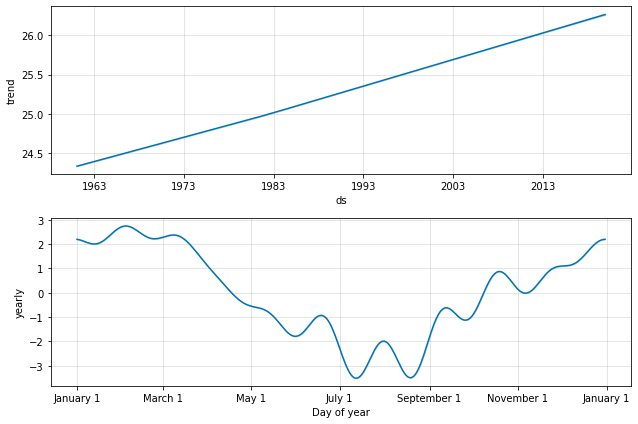

In [36]:
fig1 = pro_change.plot_components(forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


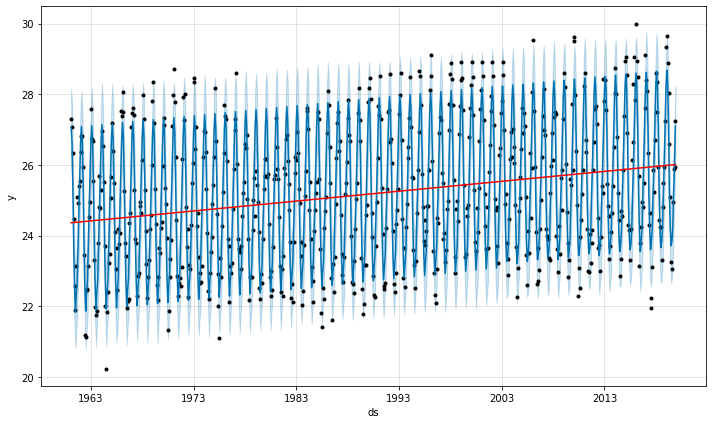

In [37]:
m= Prophet(changepoint_prior_scale=0.002)
forecast = m.fit(df_p).predict(future)
fig= m.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [38]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='2160 days', period='504 days', horizon = '1080 days')
df_cv.head()

INFO:fbprophet:Making 37 forecasts with cutoffs between 1967-04-14 00:00:00 and 2016-12-16 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1967-05-03 02:36:49.900990080,23.633573,22.754708,24.464493,23.91,1967-04-14
1,1967-06-02 13:04:09.504950496,23.446907,22.621810,24.268386,23.78,1967-04-14
2,1967-07-02 23:31:29.108910880,22.135438,21.376618,22.976773,22.28,1967-04-14
3,1967-08-02 09:58:48.712871296,22.764422,21.911585,23.516935,22.85,1967-04-14
4,1967-09-01 20:26:08.316831680,22.730260,21.891385,23.457132,22.95,1967-04-14


In [39]:
from fbprophet.diagnostics import performance_metrics
df_erro = performance_metrics(df_cv)
df_erro.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,107 days 03:33:51.683168,0.622229,0.788815,0.624455,0.024423,0.023573,0.725191
1,108 days 05:42:10.693069,0.624152,0.790033,0.625593,0.024492,0.023573,0.717557
2,109 days 07:50:29.702970,0.626009,0.791207,0.627343,0.024549,0.023704,0.717557
3,109 days 16:23:45.742574,0.624472,0.790236,0.626125,0.024500,0.023704,0.717557
4,110 days 09:58:48.712871,0.623011,0.789311,0.623375,0.024409,0.023704,0.717557


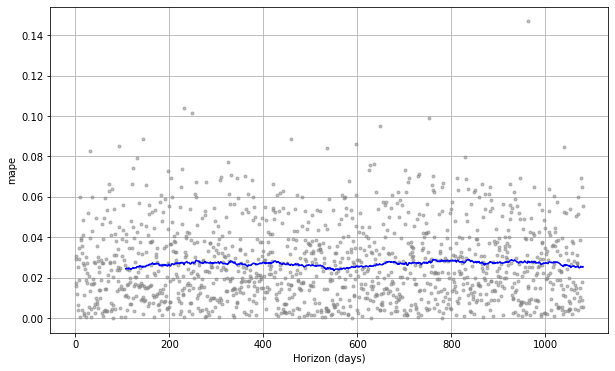

In [40]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')